## <b> The International Cricket Council (ICC) is the world governing body of cricket. It was founded as the Imperial Cricket Conference in 1909 by representatives from Australia, England and South Africa. It was renamed as the International Cricket Conference in 1965, and took up its current name in 1989. It organises world championship events such as Cricket World Cup, Women's Cricket World Cup, ICC T20 World Cup, ICC Women's T20 World Cup, ICC Champions Trophy and Under-19 Cricket World Cup.</b>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. </b>

<br>

## <u><b>Further you are required to do some analyses :</b></u>
* ### Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date
* ### Find out the top three venues which hosted the greatest number of matches.
* ### Find out the pair of cricket teams who played the most number of T20 matches against each other.
* ### Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.
* ### Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.


# <b><center> A sample scorecard </center></b>

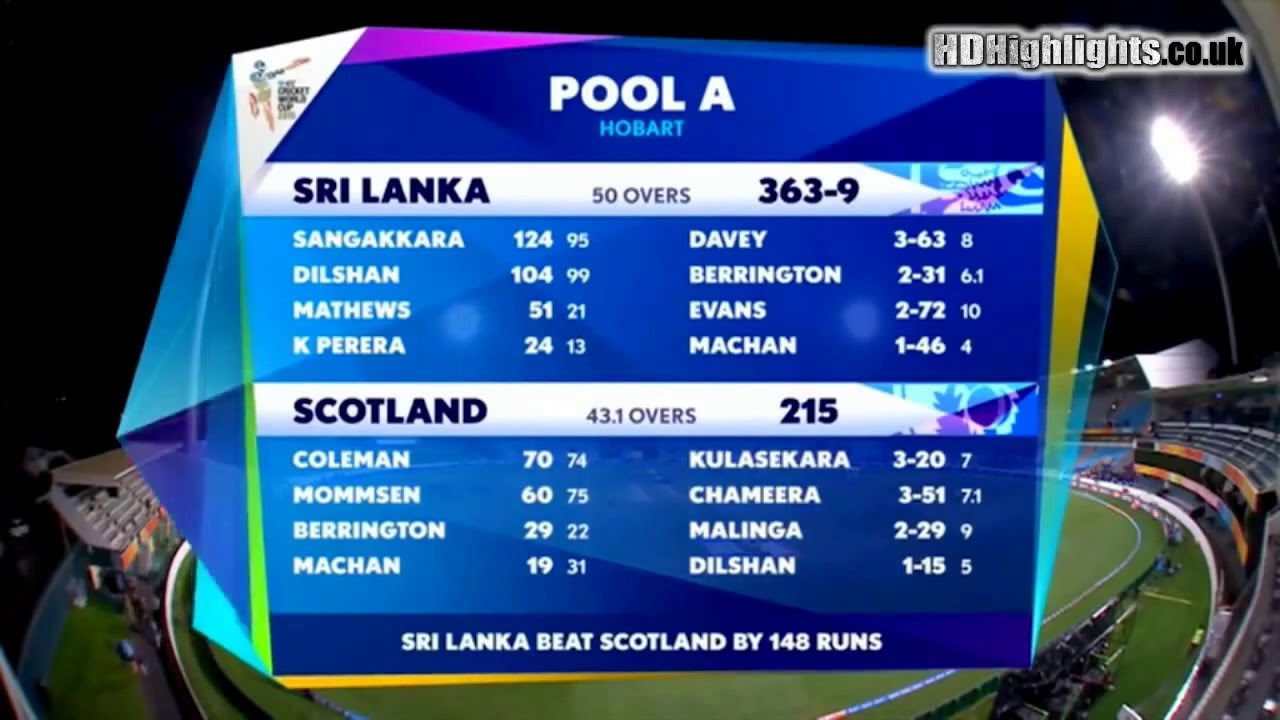

In [1]:
# Import packages
# CSV file name = International_T20_Data.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
df = pd.read_csv("International_T20_Data.csv",parse_dates=["meta.created"])

In [3]:
df.head()[:1]

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rename all the column names to their appropriate names, for example meta.created should be renamed as created_data

In [4]:
df.columns

Index(['innings', 'meta.data_version', 'meta.created', 'meta.revision',
       'info.dates', 'info.gender', 'info.match_type',
       'info.outcome.by.wickets', 'info.outcome.winner', 'info.overs',
       'info.player_of_match', 'info.teams', 'info.toss.decision',
       'info.toss.winner', 'info.umpires', 'info.venue', 'info.city',
       'info.outcome.by.runs', 'info.match_type_number', 'info.neutral_venue',
       'info.outcome.method', 'info.outcome.result', 'info.outcome.eliminator',
       'info.supersubs.New Zealand', 'info.supersubs.South Africa',
       'info.bowl_out', 'info.outcome.bowl_out'],
      dtype='object')

In [5]:
df.columns = [i.replace("meta.","").replace("info.","").replace(".","_") for i in list(df.columns)]

In [6]:
df.columns

Index(['innings', 'data_version', 'created', 'revision', 'dates', 'gender',
       'match_type', 'outcome_by_wickets', 'outcome_winner', 'overs',
       'player_of_match', 'teams', 'toss_decision', 'toss_winner', 'umpires',
       'venue', 'city', 'outcome_by_runs', 'match_type_number',
       'neutral_venue', 'outcome_method', 'outcome_result',
       'outcome_eliminator', 'supersubs_New Zealand', 'supersubs_South Africa',
       'bowl_out', 'outcome_bowl_out'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   innings                 1417 non-null   object        
 1   data_version            1417 non-null   float64       
 2   created                 1417 non-null   datetime64[ns]
 3   revision                1417 non-null   int64         
 4   dates                   1417 non-null   object        
 5   gender                  1417 non-null   object        
 6   match_type              1417 non-null   object        
 7   outcome_by_wickets      651 non-null    float64       
 8   outcome_winner          1372 non-null   object        
 9   overs                   1417 non-null   int64         
 10  player_of_match         1255 non-null   object        
 11  teams                   1417 non-null   object        
 12  toss_decision           1417 non-null   object  

## Find out the top three venues which hosted the greatest number of matches.

In [8]:
venues_df = pd.DataFrame(df.groupby("venue")["venue"].count().sort_values(ascending=False))

Text(0, 0.5, 'Number Of Mathches')

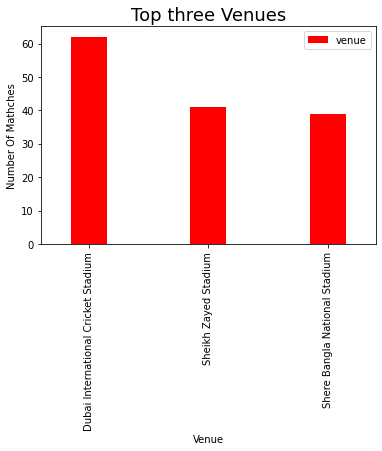

In [9]:
plt.rcParams["figure.figsize"] = (15,8)
venues_df[:3].plot(kind="bar",width=0.3,color="Red")
plt.title("Top three Venues",fontsize=18)
plt.xlabel("Venue")
plt.ylabel("Number Of Mathches")

In [10]:
### another simple way
df.venue.value_counts()[:3]

Dubai International Cricket Stadium    62
Sheikh Zayed Stadium                   41
Shere Bangla National Stadium          39
Name: venue, dtype: int64

## Find out the pair of cricket teams who played the most number of T20 matches against each other.

In [11]:
# let's create 2 new columns (team1,team2) for store the values 
df["team1"] = df["teams"].apply(lambda x: eval(x)[0])
df["team2"] = df["teams"].apply(lambda x: eval(x)[1])

In [12]:
df.head()[:1]

,innings,data_version,created,revision,dates,gender,match_type,outcome_by_wickets,outcome_winner,overs,...,neutral_venue,outcome_method,outcome_result,outcome_eliminator,supersubs_New Zealand,supersubs_South Africa,bowl_out,outcome_bowl_out,team1,team2
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Sri Lanka


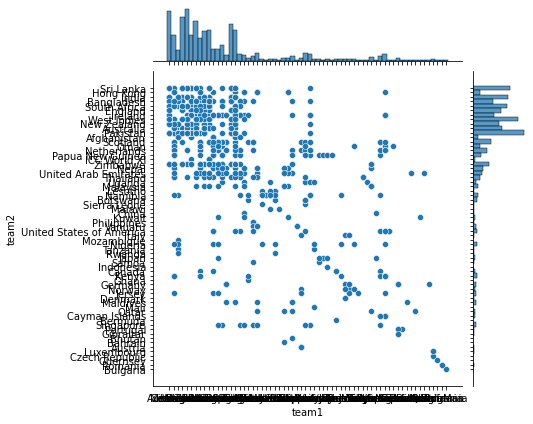

In [13]:
sns.jointplot(x="team1",y="team2",data=df)

In [14]:
def find_index(a,val):
  for i in range(len(a)):
    for j in range(len(a)):
      if a[i,j]==val:
        return i,j

In [15]:
teams = sorted(list(set(df['team1'])|set(df['team2'])))

In [16]:
len(teams)

71

In [17]:
match_matrix = np.zeros((len(teams),len(teams)),dtype= int)

In [18]:
match_matrix.shape

(71, 71)

In [19]:
for i,row in df.iterrows():
  match_matrix[teams.index(row['team1'])][teams.index(row['team2'])]+=1
  match_matrix[teams.index(row['team2'])][teams.index(row['team1'])]+=1

In [20]:
teams_index = find_index(match_matrix,match_matrix.max())

In [21]:
print(f" Teams that played the most matches together are {teams[teams_index[0]]} and {teams[teams_index[-1]]} and they played a total of {match_matrix.max()} games")

 Teams that played the most matches together are Australia and England and they played a total of 45 games


In [22]:
match_matrix.max()

45

### Another Easy way

In [23]:
sorted(eval(df.teams[5]))

['India', 'Zimbabwe']

In [24]:
def sort_teams(col):
    return sorted(eval(col))

In [25]:
df["teams"] = df["teams"].apply(sort_teams)

In [26]:
df.teams.value_counts()[:5]

[Australia, England]      45
[England, West Indies]    33
[Australia, Pakistan]     33
[Australia, India]        32
[England, Pakistan]       31
Name: teams, dtype: int64

In [27]:
print(f" Teams that played the most matches together are {df.teams.value_counts().reset_index()[:1].iloc[0][0][0]} and {df.teams.value_counts().reset_index()[:1].iloc[0][0][1]} and they played a total of {df.teams.value_counts().reset_index()[:1].iloc[0][1]} games")

 Teams that played the most matches together are Australia and England and they played a total of 45 games


Text(0, 0.5, 'Number Of Matches Played')

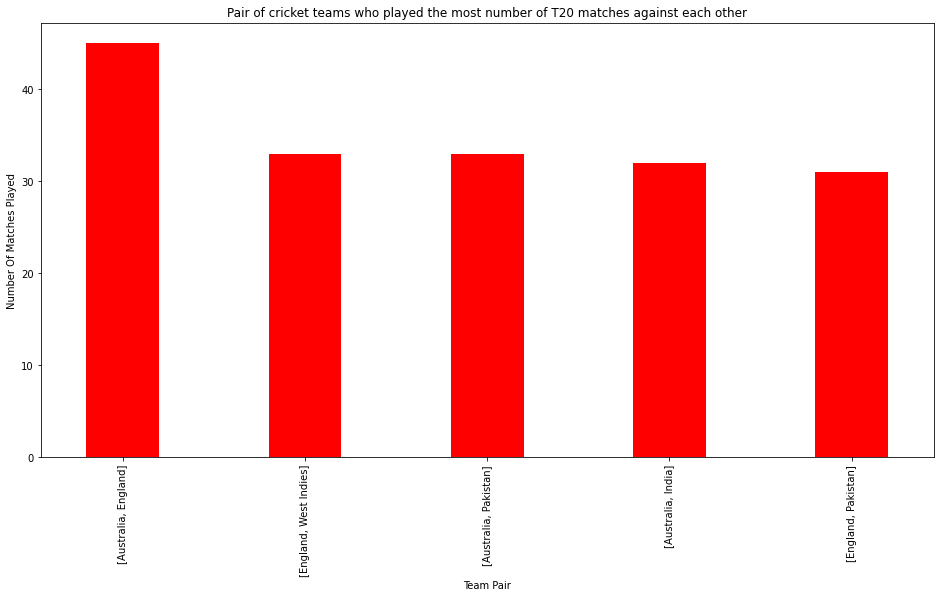

In [28]:
plt.rcParams["figure.figsize"] = (16,8)
df.teams.value_counts()[:5].plot(kind="bar",color="Red",width=0.4)
plt.title("Pair of cricket teams who played the most number of T20 matches against each other")
plt.xlabel("Team Pair")
plt.ylabel("Number Of Matches Played")

## Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.

In [29]:
winner_dict = {}
for i,row in df.iterrows():    
    if winner_dict.get(row['team1'],False) and winner_dict.get(row['team2'],False):
        try:
              if row['outcome_winner']:
                    winner_dict[row['outcome_winner']]['Wins'] += 1
        except:
              pass
        winner_dict[row['team1']]['Played']+=1
        winner_dict[row['team2']]['Played']+=1
    else:
            if not winner_dict.get(row['team1'],False):
                winner_dict[row['team1']] = {'Team':row['team1'],'Played':1,'Wins':0}
            if not winner_dict.get(row['team2'],False):
                winner_dict[row['team2']] = {'Team':row['team2'],'Played':1,'Wins':0}
            try:
                if row['outcome_winner']:
                    winner_dict[row['outcome_winner']]['Wins'] = 1
            except:
                pass

In [30]:
wins_df = pd.DataFrame(winner_dict.values())

In [31]:
wins_df.head(5)

,Team,Played,Wins
0,Australia,214,132
1,Sri Lanka,182,69
2,Ireland,126,44
3,Hong Kong,49,17
4,Zimbabwe,75,19


In [32]:
# let's create a function to calculate winning percentage of teams
wins_df["Winning Percentage"] = wins_df.apply(lambda x: round(x['Wins']/x["Played"]*100,2),axis=1)

In [33]:
wins_df.sort_values(by="Winning Percentage",ascending=False)[:5]

,Team,Played,Wins,Winning Percentage
65,Belgium,2,2,100.00
57,Spain,6,5,83.33
70,Romania,3,2,66.67
40,Indonesia,3,2,66.67
38,Tanzania,3,2,66.67


Text(0, 0.5, 'Matches')

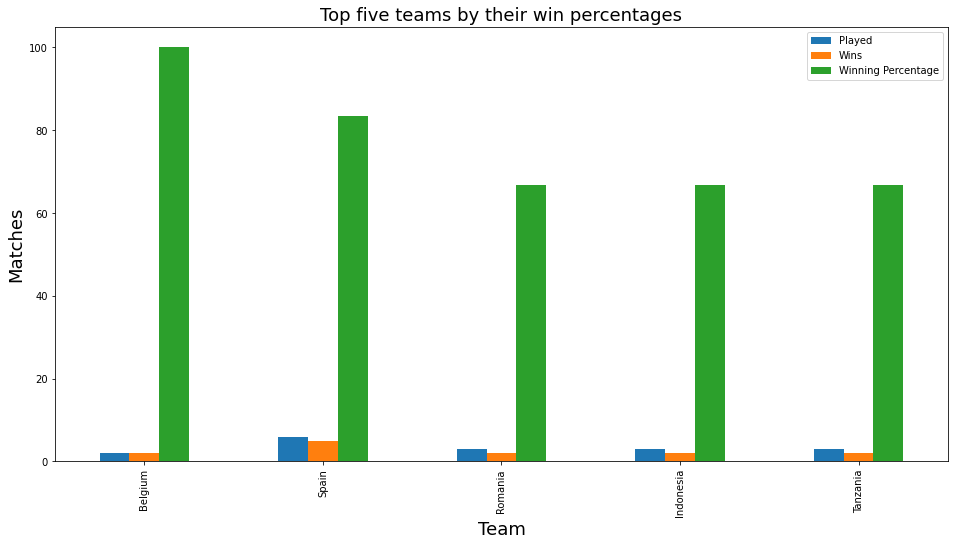

In [34]:
win_df=wins_df.sort_values(by="Winning Percentage",ascending=False)[:5].set_index("Team").plot(kind="bar")
plt.title("Top five teams by their win percentages",fontsize=18)
plt.xlabel("Team",fontsize=18)
plt.ylabel("Matches",fontsize=18)

## **Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.**

In [35]:
def find_deliveries(lod):
  keys = []
  for i in lod:
    keys += list(i.keys())
  return keys

In [36]:
def generate_scorecard(lod):
  scorecard = {}
  delivery_list = find_deliveries(lod)
  for ball,dic in zip(delivery_list,lod):
    s = dic[ball] #inner dictionary containing {batsma,bowler,nonstriker,runs and wicket}
    if s['batsman'] in scorecard.keys():
      scorecard[s['batsman']]['Runs'] += s['runs']['batsman']
      scorecard[s['batsman']]['Balls_Played'] += 1
    else:
      scorecard[s['batsman']] = {'Player': s['batsman'], "Runs" : s['runs']['batsman'], 'Balls_Played':1, 'Balls_Bowled':0, "Runs_given":0, "wicket":0}

    if s['non_striker'] not in scorecard.keys():
      scorecard[s['non_striker']] = {'Player': s['non_striker'], "Runs" : 0, 'Balls_Played':0, 'Balls_Bowled':0, "Runs_given":0, "wicket":0}
    
    if s['bowler'] in scorecard.keys():
      wicket = 0
      if s.get('wicket'):
        wicket = 1
      scorecard[s['bowler']]['Runs_given'] += s['runs']['total']
      scorecard[s['bowler']]['Balls_Bowled'] += 1
      scorecard[s['bowler']]['wicket'] += wicket
    else:
      wicket = 0
      if s.get('wicket'):
        wicket = 1
      scorecard[s['bowler']] = {'Player': s['bowler'], "Runs" : 0, 'Balls_Played':0, 'Balls_Bowled':1, "Runs_given":s['runs']['total'], "wicket":wicket}
  return pd.DataFrame(scorecard.values())

In [37]:
def find_sr_and_economy(df):
  df['Strike_Rate']=np.nan
  for i,row in df.iterrows():
    if row['Balls_Played'] != 0:
      df.loc[i,"Strike_Rate"] = round(row['Runs']/row['Balls_Played']*100)
  df['Economy']= np.nan
  for i,row in df.iterrows():
    if row['Balls_Bowled']!=0:
      df.loc[i,"Economy"] = round(row['Runs_given']/row['Balls_Bowled']*6,2)

  return df

In [38]:
def find_top_scorers(innings):
  '''
  Input innings as string
  '''
  df1 = generate_scorecard(eval(innings)[0]['1st innings']['deliveries'])
  df2 = generate_scorecard(eval(innings)[1]['2nd innings']['deliveries'])
  df1 = find_sr_and_economy(df1)
  df2 = find_sr_and_economy(df2)
  temp1_sr = df1.sort_values(by = ["Runs","Strike_Rate"],ascending = [False,False])[:4]
  temp1_ec = df1.sort_values(by = "Economy")[:4]
  temp2_sr = df2.sort_values(by = ["Runs","Strike_Rate"],ascending = [False,False])[:4]
  temp2_ec = df2.sort_values(by = "Economy")[:4]
  df1 = temp1_sr.append(temp1_ec).reset_index().drop('index',axis=1)
  df2 = temp2_sr.append(temp2_ec).reset_index().drop('index',axis=1)
  return df1,df2

In [39]:
df1,df2 = find_top_scorers(df.iloc[10,0])

C:\Users\prade\AppData\Local\Temp\ipykernel_14320\899145011.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = temp1_sr.append(temp1_ec).reset_index().drop('index',axis=1)
C:\Users\prade\AppData\Local\Temp\ipykernel_14320\899145011.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = temp2_sr.append(temp2_ec).reset_index().drop('index',axis=1)


In [40]:
print("The top Players Scorecard 1st Inning")
df1

The top Players Scorecard 1st Inning


,Player,Runs,Balls_Played,Balls_Bowled,Runs_given,wicket,Strike_Rate,Economy
0,HM Amla,62,44,0,0,0,141.0,NaN
1,F du Plessis,36,26,0,0,0,138.0,NaN
2,JP Duminy,29,16,0,0,0,181.0,NaN
3,AB de Villiers,26,17,0,0,0,153.0,NaN
4,TA Boult,0,0,24,12,2,NaN,3.00
5,C de Grandhomme,0,0,19,22,2,NaN,6.95
6,MJ Santner,0,0,24,44,0,NaN,11.00
7,C Munro,0,0,6,11,0,NaN,11.00


In [41]:
print("The top Players Scorecard 2nd Inning")
df2

The top Players Scorecard 2nd Inning


,Player,Runs,Balls_Played,Balls_Bowled,Runs_given,wicket,Strike_Rate,Economy
0,TC Bruce,33,27,0,0,0,122.0,NaN
1,TG Southee,20,6,0,0,0,333.0,NaN
2,C de Grandhomme,15,8,0,0,0,188.0,NaN
3,KS Williamson,13,14,0,0,0,93.0,NaN
4,CH Morris,0,0,18,10,2,NaN,3.33
5,AL Phehlukwayo,0,0,19,19,3,NaN,6.00
6,Imran Tahir,0,0,23,24,5,NaN,6.26
7,D Paterson,0,0,12,14,0,NaN,7.00
